In [18]:
import pandas as pd

In [19]:
data = pd.read_csv(r'data\51stKIAP_vs_36th_Round_1\Plane\Allies_PlaneId_105.csv', usecols=['Unix time', 'Roll', 'Pitch', 'Yaw', 'Longitude', 'Latitude','Altitude'])
# 设置 Unix time 为 index，并且保留这一列
data.set_index('Unix time', inplace=True, drop=False)
data.head()

,Unix time,Longitude,Latitude,Altitude,Roll,Pitch,Yaw
Unix time,,,,,,,
0,0,53.342343,26.814854,25.2,-0.1,-1.4,110.4
1,1,53.342343,26.814854,25.2,-0.1,-1.4,110.4
2,2,53.342343,26.814854,25.2,-0.1,-1.4,110.4
3,3,53.342343,26.814854,25.2,-0.1,-1.4,110.4
4,4,53.342343,26.814854,25.2,-0.1,-1.4,110.4


In [20]:
times = []

# 找到 Roll 在 -20 与 -70 之间的时间
for i in range(len(data)):
    if data.iloc[i]['Pitch'] > 7.5 and data.iloc[i]['Pitch'] < 80:
        times.append(data.iloc[i]['Unix time'])


# 遍历times, 转换为times_
times_ = []
temp = []
for i in range(len(times)):
    temp.append(times[i])
    if times[i] + 1 not in times:
        times_.append(temp)
        temp = []

# 求俯仰角累积变化量
pitch_acc = []
for i in range(len(times_)):
    temp = 0
    for j in range(len(times_[i]) - 1):
        temp += abs(data.loc[times_[i][j+1]]['Pitch'] - data.loc[times_[i][j]]['Pitch'])
    pitch_acc.append(temp)

# 求高度变化
altitude_change = []
for i in range(len(times_)):
    temp = abs(data.loc[times_[i][-1]]['Altitude'] - data.loc[times_[i][0]]['Altitude'])
    altitude_change.append(temp)

flag = []
for i in range(len(altitude_change)):
    # if altitude_change[i] > 
    # if pitch_acc[i] > 20 and pitch_acc[i] < 80:
    flag.append(i)
altitude_change

[54.36000000000001,
 68.15999999999998,
 0.0,
 31.829999999999984,
 12013.300000000001,
 826.1100000000006,
 563.5599999999995,
 313.2999999999993,
 98.98999999999978,
 245.1299999999992,
 1220.3600000000001,
 452.0799999999999,
 70.73000000000002,
 0.0,
 428.03999999999985,
 132.39999999999998,
 2419.7799999999997,
 2740.8399999999997,
 31.76000000000022,
 289.4899999999998,
 63.1899999999996]

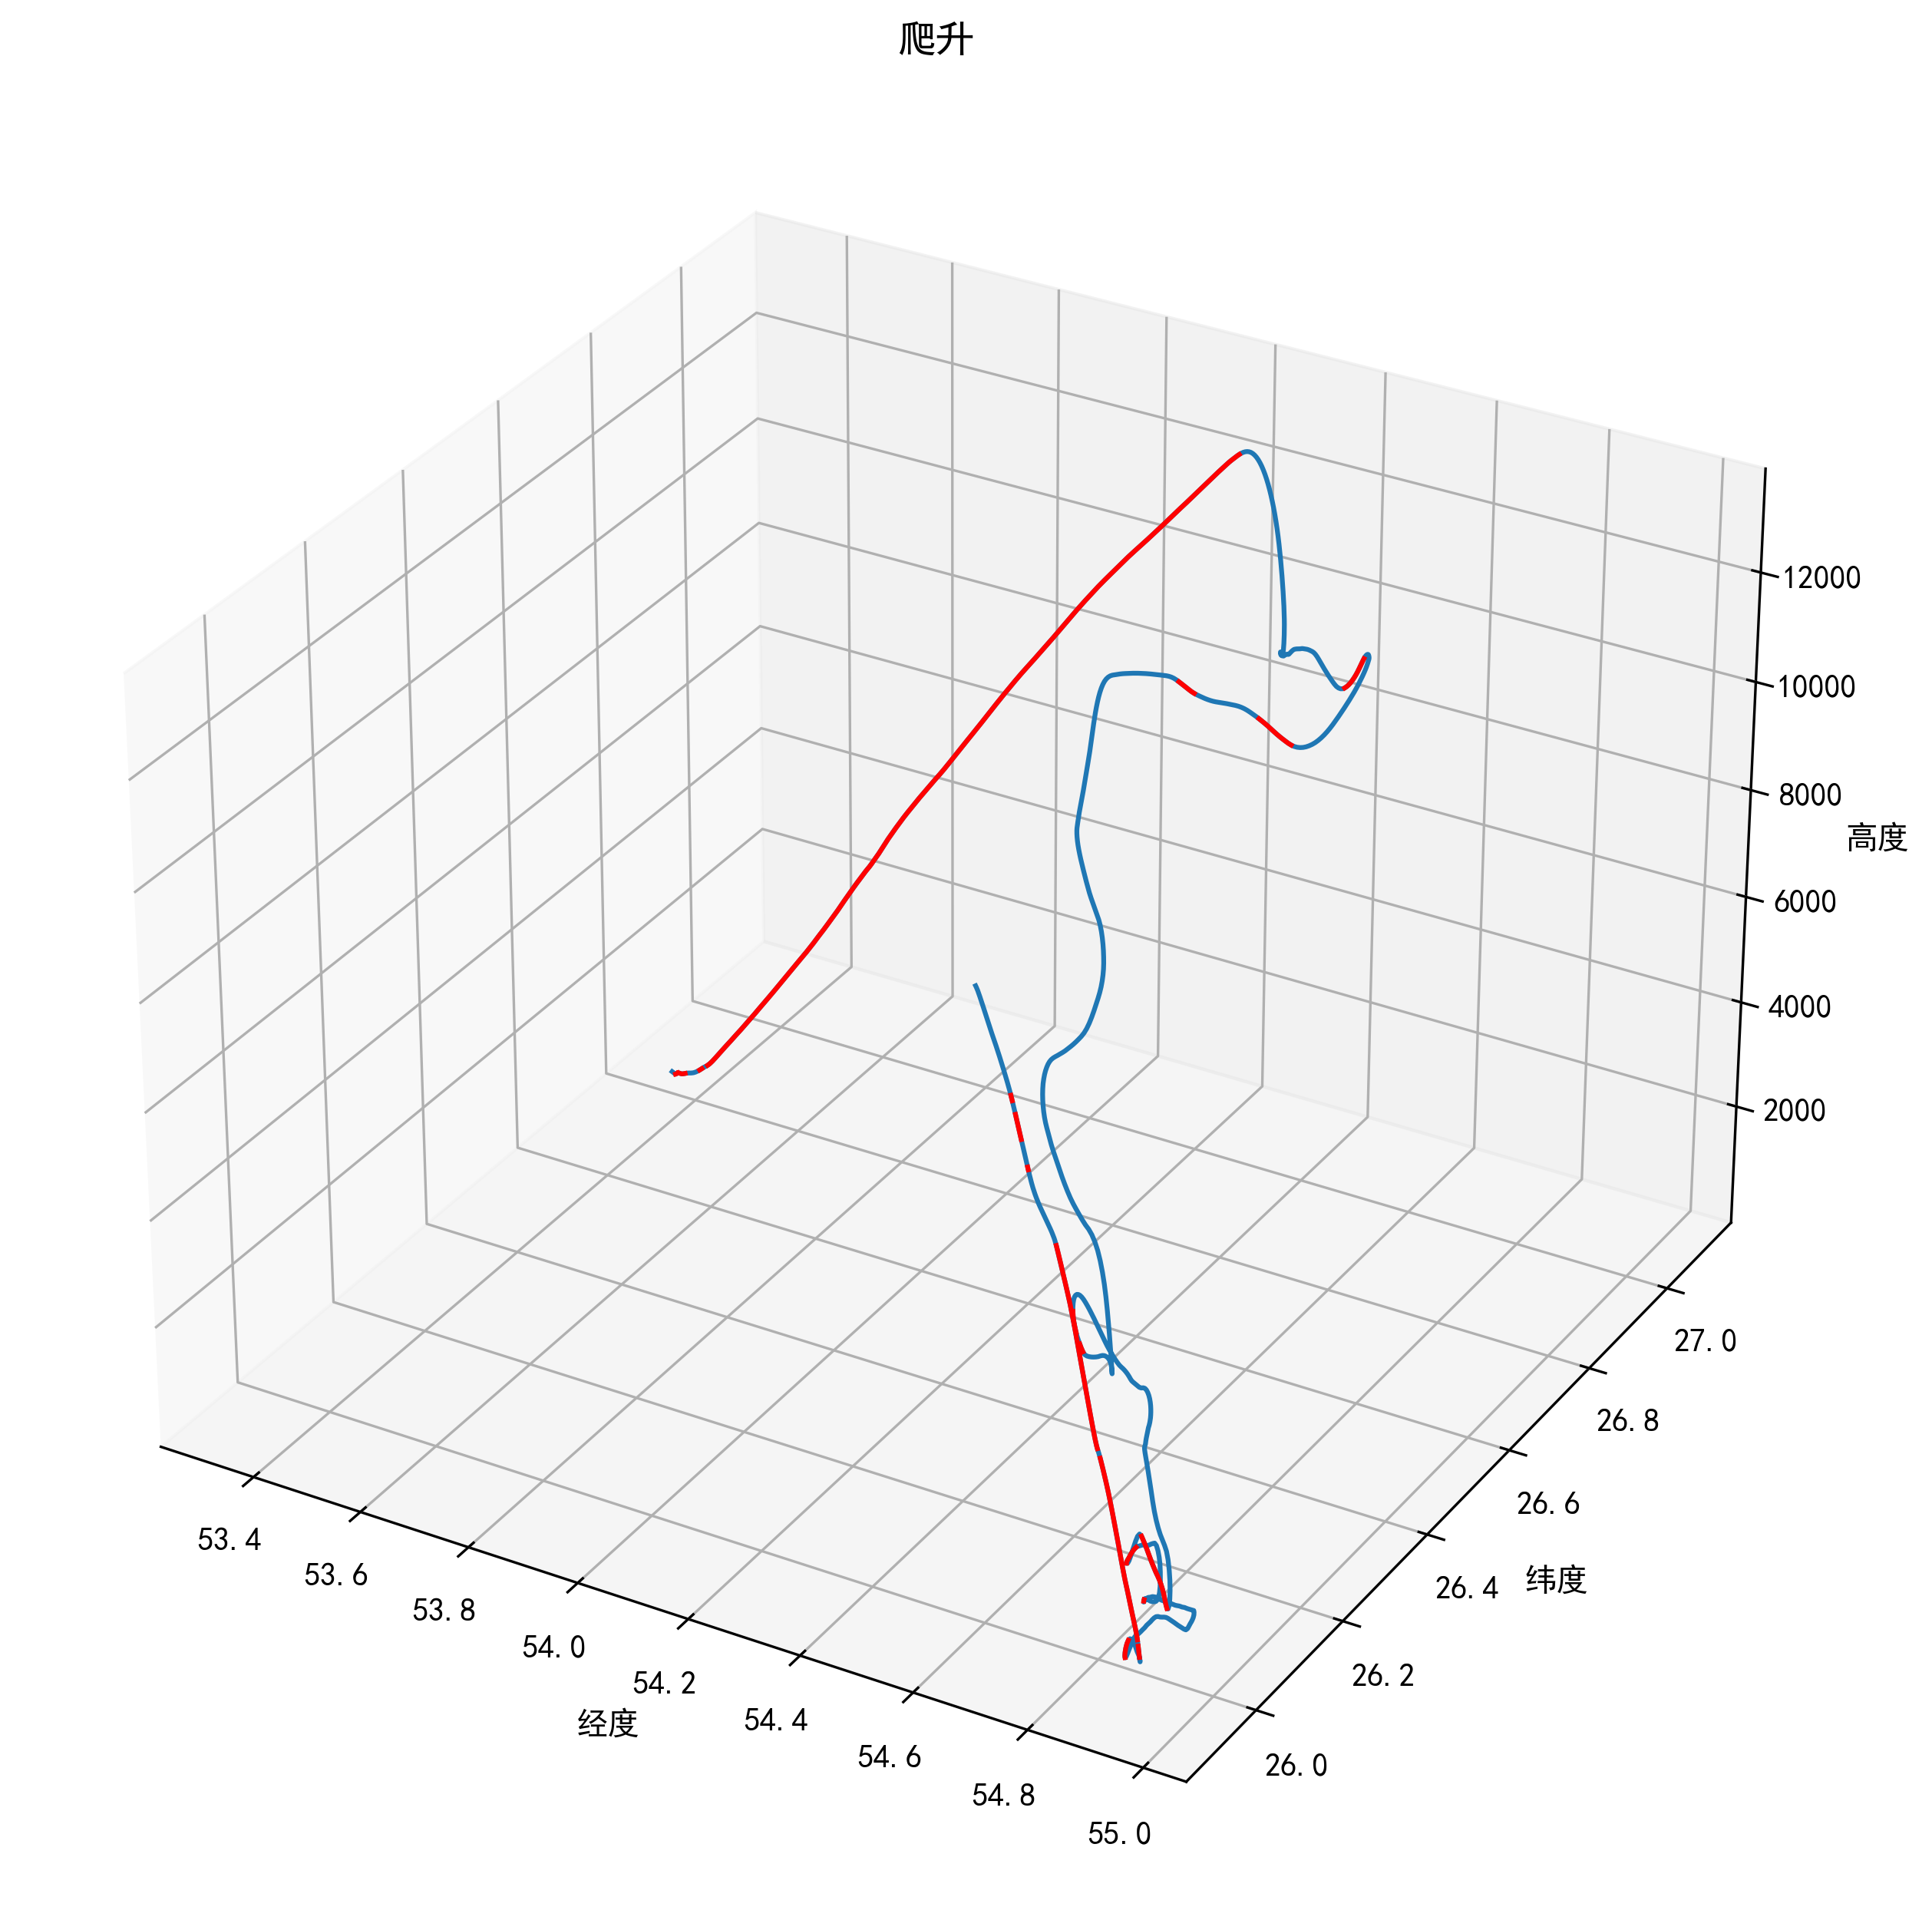

[[53.3517619,
  53.3525514,
  53.3533671,
  53.3541987,
  53.3550349,
  53.3558703,
  53.3567185,
  53.3575812],
 [53.3593667,
  53.3603107,
  53.3612933,
  53.3623171,
  53.3633801,
  53.3644901,
  53.3656261,
  53.3668072,
  53.3680324,
  53.3693114,
  53.3706191,
  53.371946,
  53.3733039,
  53.3746766,
  53.3760722],
 [53.3997977],
 [53.4033518, 53.4051182, 53.4069073],
 [53.4159601,
  53.4177819,
  53.4196158,
  53.4214474,
  53.4232939,
  53.4251241,
  53.4269774,
  53.4288247,
  53.430669,
  53.4325318,
  53.4343564,
  53.4361641,
  53.4379324,
  53.4396809,
  53.4413845,
  53.4430879,
  53.4447676,
  53.4464574,
  53.4481681,
  53.4498756,
  53.4515746,
  53.4532684,
  53.454941,
  53.456627,
  53.4583191,
  53.4600085,
  53.4617091,
  53.4634124,
  53.465126,
  53.4668303,
  53.4685447,
  53.470274,
  53.4720017,
  53.4737219,
  53.4754351,
  53.4771581,
  53.4788675,
  53.4805994,
  53.4823406,
  53.4840703,
  53.4858222,
  53.487583,
  53.4893334,
  53.4911,
  53.4928663,
  

In [21]:
# 获取经度、维度、高度
longitude = []
latitude = []
altitude = []
for i in range(len(data['Longitude'].to_list())):
    longitude.append(data['Longitude'].to_list()[i])
    latitude.append(data['Latitude'].to_list()[i])
    altitude.append(data['Altitude'].to_list()[i])


longitude1 = []
latitude1 = []
altitude1 = []
for i in range(len(flag)):
    temp_long = []
    temp_lat = []
    temp_alt = []
    for j in range(len(times_[flag[i]])):
        temp_long.append(data.loc[times_[flag[i]][j]]['Longitude'])
        temp_lat.append(data.loc[times_[flag[i]][j]]['Latitude'])
        temp_alt.append(data.loc[times_[flag[i]][j]]['Altitude'])
    longitude1.append(temp_long)
    latitude1.append(temp_lat)
    altitude1.append(temp_alt)

# 绘制三维轨迹图
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


ax = fig.add_subplot(111, projection='3d')
ax.plot(longitude, latitude, altitude)
# 绘制在同一张图上一条红线
for i in range(len(longitude1)):
    ax.plot(longitude1[i], latitude1[i], altitude1[i], color='r')

ax.set_xlabel('经度')
ax.set_ylabel('纬度')
ax.set_zlabel('高度')

# 设置DPI为300
fig.set_dpi(300)
# 设置图片大小
fig.set_size_inches(18.5, 10.5)
# 设置标题
plt.title('爬升')
# 保存图片
plt.savefig('./fig/爬升.png', dpi=300)
plt.show()
# 保存图片

longitude1 
